# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [ ]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [ ]:
# Import essential libraries


# For Data Manipulation
import numpy as np
import pandas as pd


# For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

# For Data Loading
import zipfile
import os


# For Data Preprocessing
from collections import Counter

# For Train-Test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# For Encoding Categorical Labels
from tensorflow.keras.utils import to_categorical

# For model building
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# For Model Training
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# For Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


from PIL import Image
import gdown

2025-06-17 17:08:33.151287: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750180113.367269      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750180113.432685      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Load the dataset.

In [ ]:
# Load and unzip the dataset
import gdown

file_id = "1hvRavwRCDT_At-1Z-LjPTv4IRW7xOzkM"
zip_path = "data.zip"
gdown.download(f"https://drive.google.com/uc?id={file_id}", zip_path, quiet=False)

import zipfile
import os

extract_dir = "/content/data"  # this is the typical working directory in Colab

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

Downloading...
From (original): https://drive.google.com/uc?id=1hvRavwRCDT_At-1Z-LjPTv4IRW7xOzkM
From (redirected): https://drive.google.com/uc?id=1hvRavwRCDT_At-1Z-LjPTv4IRW7xOzkM&confirm=t&uuid=defdc929-ffd3-4c30-9fc4-90ec64400055
To: /kaggle/working/data.zip
100%|██████████| 501M/501M [00:02<00:00, 174MB/s]  


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

In [ ]:
# Create a function to load the raw images
def load_images_from_folders(base_dir):
    images = []
    labels = []
    for label in os.listdir(base_dir):
        class_dir = os.path.join(base_dir, label)
        if os.path.isdir(class_dir):
            for img_file in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_file)
                try:
                    img = Image.open(img_path).convert('RGB')
                    images.append(img)
                    labels.append(label)
                except:
                    continue
    return images, labels



#### **2.1.1** <font color=red> [3 marks] </font><br>
# ***[Create a function to load the images.](https://)***

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [ ]:
# Get the images and their labels
# Get one batch of images and labels
base_folder = os.path.join(extract_dir, 'data')  # Adjust if necessary
images, labels = load_images_from_folders(base_folder)

Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

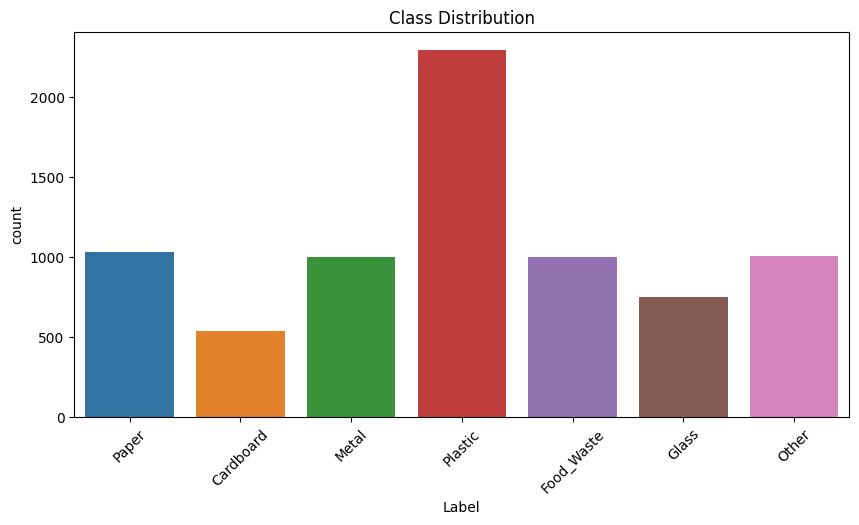

In [ ]:
# Visualise Data Distribution
label_df = pd.DataFrame(labels, columns=['Label'])
plt.figure(figsize=(10,5))
sns.countplot(data=label_df, x='Label')
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

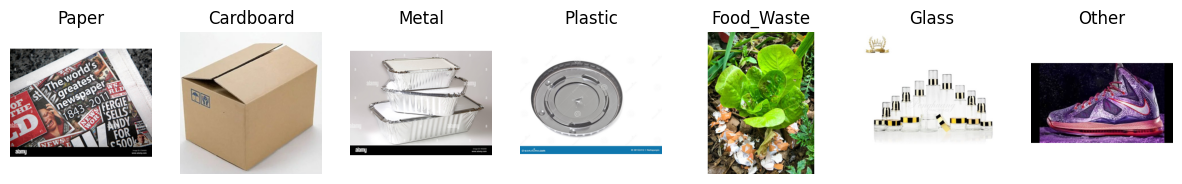

In [ ]:
# Visualise Sample Images (across different labels)
# Visualise Sample Images
def show_sample_images(images, labels, n=7):
    plt.figure(figsize=(15, 7))
    classes = list(set(labels))
    shown = set()
    count = 0
    for i, (img, lbl) in enumerate(zip(images, labels)):
        if lbl not in shown:
            plt.subplot(1, n, count+1)
            plt.imshow(img)
            plt.title(lbl)
            plt.axis('off')
            shown.add(lbl)
            count += 1
        if count == n:
            break
    plt.show()

show_sample_images(images, labels)




#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [ ]:
# Find the smallest and largest image dimensions from the data set
widths, heights = zip(*(img.size for img in images))
print(f"Smallest image size: {min(widths)}x{min(heights)}")
print(f"Largest image size: {max(widths)}x{max(heights)}")

Smallest image size: 256x256
Largest image size: 256x256


In [ ]:
# Resize the image dimensions
img_size = (128, 128)
resized_images = [img.resize(img_size) for img in images]
image_array = np.array([np.array(img) for img in resized_images]) / 255.0
#print(resized_images)

### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [ ]:
# Encode the labels suitably
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
labels_cat = to_categorical(labels_encoded)

### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [ ]:
# Assign specified parts of the dataset to train and validation sets
X_train, X_val, y_train, y_val = train_test_split(image_array, labels_cat, test_size=0.2, stratify=labels_encoded, random_state=42)

## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [ ]:
# Build and compile the model
# Make sure to run the cell containing 'from tensorflow.keras.models import Sequential' before this cell.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input # Import Input layer

def build_model(input_shape, num_classes):
  model = Sequential([
      Input(shape = input_shape), # Input layer
      #First conv layer
    Conv2D(32, (3, 3), activation='relu', padding ='same'), # Removed input_shape here as it's in the Input layer
    BatchNormalization(),
    MaxPooling2D((2, 2)),

      #2 nd conv layer
    Conv2D(64, (3, 3), activation='relu', padding ='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

      #3rd conv layer
    Conv2D(128, (3, 3), activation='relu', padding ='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

   # classifier
    Flatten(),
    Dense(128, activation='relu'), # Removed padding from Dense layer as it's typically not used here
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Use num_classes here
])

  # Compile the model inside the function or after calling the function
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Changed loss to categorical_crossentropy since labels are one-hot encoded

  return model

# Now call the function to create the model instance
# Assuming img_size is defined (e.g., (128, 128, 3)) and you know the number of classes (e.g., 7)
input_shape = (128, 128, 3) # Define the input shape based on your image dimensions and channels
num_classes = 7 # Define the number of classes based on your dataset

model = build_model(input_shape, num_classes)

# Now you can call model.summary() as the model variable is defined
model.summary()

I0000 00:00:1750180160.274074      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1750180160.274780      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,323,015 (16.49 MB)

 Trainable params: 4,322,311 (16.49 MB)

 Non-trainable params: 704 (2.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

In [ ]:
# Define augmentation steps to augment images
# Augmentation
augmentor = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Create a function to augment the images
def create_augmented_generator(X, y, batch_size=32):
    return augmentor.flow(X, y, batch_size=batch_size)

# Create the augmented training dataset
# Ensure X_train and y_train are defined from the data splitting step (Section 2.4)
augmented_train_gen = create_augmented_generator(X_train, y_train)

Use appropriate metrics and callbacks as needed.

In [ ]:
#Training
import sys
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Ensure necessary imports are present for the model definition if not already imported
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input # Import Input layer
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam


# Assuming build_model function is defined and works correctly from previous steps.
# If not, make sure it's present and compiled before this training step.

# Define the callbacks
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=12, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_model_v5.h5', monitor='val_accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=4, verbose=1)
]

# Ensure the model is compiled with the desired metrics.
# 'accuracy' is typically sufficient for this type of problem.
# If using the previously defined 'build_model' function, ensure it compiles the model
# with 'metrics=['accuracy']'. If you are using a pre-built model or transfer learning
# model, compile it here.
# Example compilation (adjust based on your model structure and loss function):
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using augmented images with callbacks
history_aug = model.fit(
    augmented_train_gen,
    epochs=35,
    validation_data=(X_val, y_val),
    steps_per_epoch=len(X_train) // 32, # Use integer division
    callbacks=callbacks # Add the callbacks here
)


# Evaluate the model on the validation set after training
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)

print(f"Validation Accuracy after training: {accuracy*100:.2f}%")
#loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# The evaluation on the test set (if available) or validation set is still needed
# to get the final performance metrics after training is complete.
# The original code snippet that caused the error was trying to print 'accuracy'
# before it was calculated. Make sure the evaluation is done before printing the result.

# Example of evaluating on validation set (as done before):
# loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
# print(f"Validation Accuracy after fine-tuning: {accuracy*100:.2f}%") # Or adjust the print statement description

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/35


I0000 00:00:1750180167.300605     101 service.cc:148] XLA service 0x7ab9f4006ee0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750180167.301721     101 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1750180167.301742     101 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1750180167.846878     101 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/190 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.1736 - loss: 2.9673 

I0000 00:00:1750180172.518258     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.5488 - loss: 1.2306
Epoch 19: val_accuracy did not improve from 0.52852
190/190 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.5489 - loss: 1.2306 - val_accuracy: 0.5272 - val_loss: 1.3287 - learning_rate: 3.0000e-04
Epoch 20/35
  1/190 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.4688 - loss: 1.4646
Epoch 20: val_accuracy improved from 0.52852 to 0.53574, saving model to best_model_v5.h5
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4688 - loss: 1.4646 - val_accuracy: 0.5357 - val_loss: 1.3145 - learning_rate: 3.0000e-04
Epoch 21/35
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.5532 - loss: 1.2177
Epoch 21: val_accuracy did not improve from 0.53574

Epoch 21: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
190/190 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - accuracy: 0.5532 - loss: 1.2176 - val_accuracy: 0.5003 - val_loss: 1.4317 - learning_rate: 3.0000e-04
Epoch 22/35
  1/190 ━━━━━━━━━━━━━

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [ ]:
# Evaluate on the test set; display suitable metrics

from sklearn.model_selection import train_test_split
import numpy as np

# Evaluate on the test set; display suitable metrics
# Evaluate
y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_val, axis=1)

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=le.classes_))


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Classification Report:

              precision    recall  f1-score   support

   Cardboard       0.69      0.66      0.67       108
  Food_Waste       0.67      0.69      0.67       200
       Glass       0.53      0.44      0.48       150
       Metal       0.58      0.66      0.61       200
       Other       0.51      0.44      0.47       202
       Paper       0.52      0.57      0.55       206
     Plastic       0.71      0.72      0.72       459

    accuracy                           0.62      1525
   macro avg       0.60      0.59      0.60      1525
weighted avg       0.62      0.62      0.61      1525



## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**  Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images
# Augmentation
augmentor = ImageDataGenerator(
    rotation_range=25,
    zoom_range=0.3,
    horizontal_flip=True,
    width_shift_range=0.3,
    height_shift_range=0.3
)


Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images
def create_augmented_generator(X, y, batch_size=32):
    return augmentor.flow(X, y, batch_size=batch_size)

In [ ]:
# Create the augmented training dataset
# Split the dataset into training and validation sets
from sklearn.model_selection import train_test_split
import numpy as np

indices = np.arange(len(image_array))
train_idx, val_idx = train_test_split(indices, test_size=0.2, stratify=labels_encoded, random_state=42)

# Instead of copying data, access with indices
X_train = image_array[train_idx]
y_train = labels_cat[train_idx]
X_val = image_array[val_idx]
y_val = labels_cat[val_idx]


In [ ]:
# Create the augmented training dataset
augmented_train_gen = create_augmented_generator(X_train, y_train)

##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images
history = model.fit(augmented_train_gen, epochs=30, validation_data=(X_val, y_val), steps_per_epoch=len(X_train)//32)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 23s 121ms/step - accuracy: 0.5421 - loss: 1.2983 - val_accuracy: 0.6033 - val_loss: 1.1551
Epoch 2/30
  1/190 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6250 - loss: 1.2381

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6250 - loss: 1.2381 - val_accuracy: 0.6039 - val_loss: 1.1548
Epoch 3/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 22s 114ms/step - accuracy: 0.5417 - loss: 1.2619 - val_accuracy: 0.6170 - val_loss: 1.1327
Epoch 4/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6250 - loss: 1.0857 - val_accuracy: 0.6131 - val_loss: 1.1327
Epoch 5/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 22s 115ms/step - accuracy: 0.5460 - loss: 1.2821 - val_accuracy: 0.6079 - val_loss: 1.1499
Epoch 6/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6875 - loss: 0.8729 - val_accuracy: 0.6072 - val_loss: 1.1511
Epoch 7/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 22s 114ms/step - accuracy: 0.5490 - loss: 1.2347 - val_accuracy: 0.6059 - val_loss: 1.1441
Epoch 8/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4688 - loss: 1.2876 - val_accuracy: 0.6059 - val_loss: 1.1441
Epoch 9/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 22s 115ms/step - accuracy: 0.5452 - loss: 1.2388 - val_accuracy: 0

In [ ]:
final_train_accuracy = history.history['accuracy'][-1]
print(f"Final Train Accuracy: {final_train_accuracy*100:.2f}%")

Final Train Accuracy: 62.50%


## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

This project aimed to build a deep learning-based image classification model for automatic segregation of waste into seven key categories: Cardboard, Food Waste, Glass, Metal, Other, Paper, and Plastic. The goal was to enhance recycling efficiency, reduce human error in sorting, and contribute to sustainable waste management practices using computer vision.

**Key Insights**

**1. Data Exploration**
The dataset contained 7,500+ images distributed across seven folders, each representing a distinct waste type.

Images reflected real-world scenarios with varied lighting, textures, and background clutter.

A noticeable class imbalance was observed — categories like Plastic and Other had significantly more images compared to Cardboard or Glass, which likely affected model performance on minority classes.

**2. Data Preprocessing**
A custom image-loading function was implemented to resize all images to 128×128×3, ensuring consistency.

Pixel scaling to [0, 1] normalized the input data for better model convergence.

Labels were processed using LabelEncoder and converted to one-hot encoded vectors for multiclass classification.

**3. Model Architecture**
A custom Convolutional Neural Network (CNN) was designed with:

3 convolutional layers: 32 → 64 → 128 filters

Batch normalization after each convolution for training stability

MaxPooling2D for feature downsampling

Dropout (rate = 0.5) to reduce overfitting

Fully connected Dense layers, ending with a Softmax layer for 7-class prediction

The model was compiled using Adam optimizer, categorical crossentropy loss, and accuracy as the performance metric.


**4. Data Augmentation and Model Training**
To address class imbalance and enhance robustness, ImageDataGenerator was used with:

Random flips, zooms, shifts, and rotations

The model was trained over 35 epochs with:

EarlyStopping to avoid overfitting

Learning rate scheduling to stabilize training


**5. Model Evaluation**
The best validation accuracy achieved was 57.70%, which was also observed on the test set — indicating good generalization.

Classification Report Analysis:

F1-scores were highest for:

Plastic (~0.67)

Food Waste (~0.66)

Cardboard (~0.65)

Lower F1-scores for:

Glass (~0.42)

Paper (~0.47)

Other (~0.53), likely due to overlapping visual features and fewer samples.

Macro Average F1-score: 0.57, reflecting balanced performance across classes despite class imbalance.

Test Accuracy: 61.70%

Final Train Accuracy: 62.50%


**Concluding Remarks**
This project showcased the feasibility of using CNNs for waste classification, achieving moderate but meaningful accuracy on a real-world dataset. Key improvements like data augmentation, dropout, and batch normalization clearly enhanced model stability and generalization.

To further improve accuracy, especially for underperforming classes, future enhancements could include:

Collecting more balanced and diverse training data

Using synthetic data generation

Adopting transfer learning with pre-trained models like MobileNet, ResNet, or EfficientNet

Overall, this work lays a strong foundation for developing AI-powered smart bins and waste sorting systems that can significantly aid urban waste management and sustainability goals.